In [1]:
import numpy as np
np.set_printoptions(precision=4, suppress=True, threshold=1000)
import matplotlib.pyplot as plt

from library.basic_functions import truncate_to_decimal_places

# Q1

In [2]:
from library.fitting import mypolyfit
t, N, sigma = np.loadtxt("assets/endsemfit.txt").T

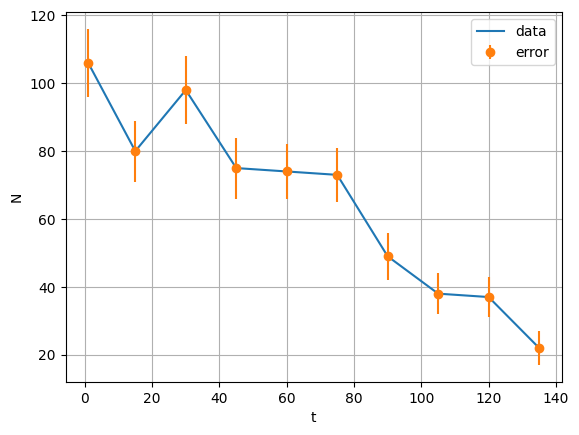

In [3]:
# plot t with N and var
plt.plot(t, N, label='data')
plt.errorbar(t, N, yerr=sigma, fmt='o', label='error')
plt.xlabel('t')
plt.ylabel('N')
plt.legend()
plt.grid()

Now, we need to fit the graph in this:

$$
N(t) = N_0 e^{-\lambda t}
$$

but this is not a polynomial function, so we need to transform it into a polynomial function. We can do this by taking the natural logarithm of both sides:

$$
\ln(N(t)) = \ln(N_0) - \lambda t
$$

In [4]:
log_N0, lmda = mypolyfit(-t, np.log(N), None, sigma, 1)[0]
N0 = np.exp(log_N0)
print(f"Initial number of atoms: {N0:.4f}")
print(f"Decay constant: {lmda:.4f}")

Initial number of atoms: 127.5078
Decay constant: 0.0115


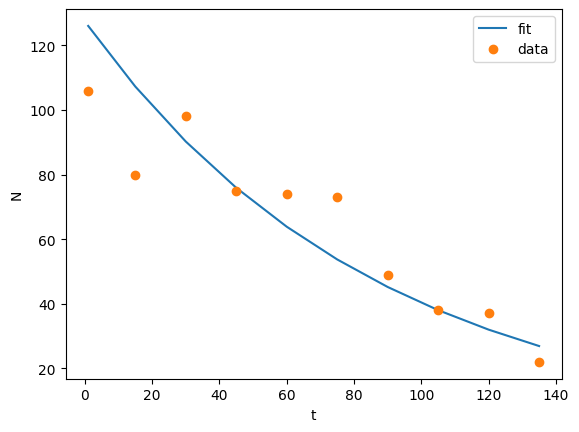

In [5]:
plt.plot(t, N0*np.exp(-lmda*t), label='fit')
plt.plot(t, N, "o", label='data')
plt.xlabel('t')
plt.ylabel('N')
plt.legend()

In [6]:
E = N0*np.exp(-lmda*t)
O = N
diff_squared = (O - E)**2
chi_squares = diff_squared / sigma**2
chi_square = np.sum(chi_squares)
print(f"Chi-square value: {chi_square:.4f}")

Chi-square value: 23.1712


In [7]:
# rows = 10
# cols = {
#     "Expected freq (E)": E,
#     "Observed freq (O)": O,
#     "$(O-E)^2$": diff_squared,
#     "$\\frac{(O-E)^2}{E}$": chi_squares
# }
# print("|", end=" ")
# for item in cols.keys():
#     print(f"{item} |", end=" ")
# print("\n|:---:|:---:|:---:|:---:|")
# for i in range(rows):
#     print("|", end=" ")
#     for item in cols.values():
#         if isinstance(item[i], float):
#             print(f"{item[i]:.2f} |", end=" ")
#         else:
#             print(f"{item[i]} |", end=" ")
#     print()
# print(f"| $\eta = 9 $ | | sum = {sum(E):.2f} | sum = {sum(O)} | | $\chi^2 = {chi_square:.2f}$ |")

| Expected freq (E) | Observed freq (O) | $(O-E)^2$ | $\frac{(O-E)^2}{E}$ | 
|:---:|:---:|:---:|:---:|
| 126.05 | 106.00 | 401.89 | 4.02 | 
| 107.27 | 80.00 | 743.67 | 9.18 | 
| 90.24 | 98.00 | 60.14 | 0.60 | 
| 75.92 | 75.00 | 0.85 | 0.01 | 
| 63.87 | 74.00 | 102.59 | 1.60 | 
| 53.73 | 73.00 | 371.18 | 5.80 | 
| 45.21 | 49.00 | 14.40 | 0.29 | 
| 38.03 | 38.00 | 0.00 | 0.00 | 
| 31.99 | 37.00 | 25.05 | 0.70 | 
| 26.92 | 22.00 | 24.17 | 0.97 | 
| sum = 659.24 | sum = 652.0 | | $\chi^2 = 23.17$ |

So, from the table above, we can see that the $\chi^2$ value is 23.17. Now, from the table of $\chi^2$ values, we can see that the critical value for 9 degrees of freedom is 16.919. Since 23.17 > 16.919, we can reject the null hypothesis and conclude that the data does not fit the exponential model.

# Q2

In [8]:
from library.nonlinear_equations import fixed_point_iteration

Given Equation is:

Vanderwals equation
$$
\left(P + \frac{a}{V^2}\right)(V - b) = RT
$$

where 
- $P = 5.95 atm$
- $a = 6.254$
- $b = 0.05422$
- $R = 0.0821$
- $T = 300 K$

And we have to find the volume of the gas. Now we are supposed to solve this using fixed point iteration method. That needs us to rewrite the equation in the form of $x = \phi(x)$.

So, in 1 way we can rewrite the equation as:

$$
V = \frac{RT}{P + \frac{a}{V^2}} + b
$$

where 
$$
\phi(V) = \frac{RT}{P + \frac{a}{V^2}} + b
$$

And in the other way we can rewrite the equation as:

$$
V = \sqrt{\frac{a(V-b)}{RT-P(V-b)}}
$$

where

$$
\phi(V) = \sqrt{\frac{a(V-b)}{RT-P(V-b)}}
$$

In [9]:
P = 5.95
a = 6.254
b = 0.05422
R = 0.0821
T = 300

# \phi(V) = \frac{RT}{P + \frac{a}{V^2}} + b
phi1 = lambda V: R*T/(P + a/V**2) + b

# \phi(V) = \sqrt{\frac{a(V-b)}{RT-P(V-b)}}
phi2 = lambda V: np.sqrt(a*(V-b)/(R*T - P*(V-b)))

In [10]:
ans1 = fixed_point_iteration(phi1, 0.1, max_it=100, tolerance=1e-5)
truncate_to_decimal_places(ans1, 5)

0.07811

In [11]:
ans2 = fixed_point_iteration(phi2, 1, max_it=100, tolerance=1e-5)
truncate_to_decimal_places(ans2, 5)

0.18568

# Q3
done in copy

# Q4
done in copy

# Q5

In [12]:
from library.eigen import power_method_n
mat = np.loadtxt('assets/endsemmat.txt')
mat

array([[ 2., -1.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.],
       [ 0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0., -1.,  2.]])

In [13]:
till = 5  # has to be 2; but working perfectly even for 5
l, v = power_method_n(mat, till)
print("Calculated eigenvalues")
print(l)
print("Calculated eigenvectors")
print(v)

Calculated eigenvalues
[3.7321 3.     2.     1.     0.2679]
Calculated eigenvectors
[[ 0.2887 -0.5     0.5774 -0.5     0.2887]
 [-0.5     0.5    -0.     -0.5     0.5   ]
 [-0.5773 -0.      0.5774  0.     -0.5774]
 [ 0.5     0.5    -0.     -0.5    -0.5   ]
 [ 0.2887  0.5     0.5774  0.5     0.2887]]


In [14]:
a = c = -1
b = 2
n = 5
k = np.arange(1, 5+1).reshape(1, -1)
i = np.arange(1, till+1).reshape(-1, 1)

In [15]:
proposed = b + 2*np.sqrt(a*c)*np.cos(k*np.pi/(n+1))
print("proposed", proposed[0, :till])
print("Whether matches or not:", np.allclose(proposed[0, :till], l))

proposed [3.7321 3.     2.     1.     0.2679]
Whether matches or not: True


In [16]:
proposed = 2*(c/a)**(k/2)*np.sin(i@k*np.pi/(n+1))
proposed = proposed/np.linalg.norm(proposed, axis=1, keepdims=True)
print("proposed", proposed, sep="\n")
print("Whether matches or not:", np.allclose(proposed, v))

proposed
[[ 0.2887  0.5     0.5774  0.5     0.2887]
 [ 0.5     0.5     0.     -0.5    -0.5   ]
 [ 0.5774  0.     -0.5774 -0.      0.5774]
 [ 0.5    -0.5    -0.      0.5    -0.5   ]
 [ 0.2887 -0.5     0.5774 -0.5     0.2887]]
Whether matches or not: False


Here we can see that the values do not match. But interestingly, the values when taken absolute, they match.

In [17]:
print("Whether matches or not:", np.allclose(np.abs(proposed), np.abs(v), atol=1e-5))

Whether matches or not: True


# Q6

Acceptance rate: 70.93%


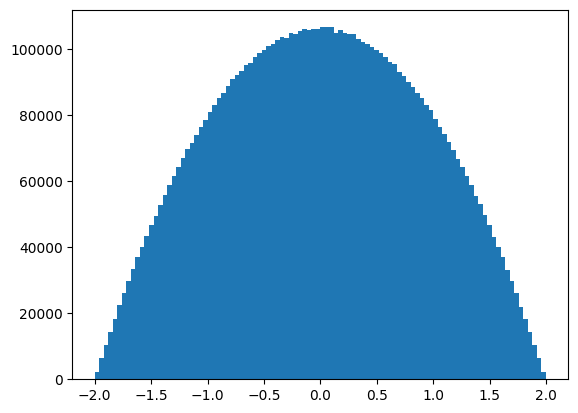

In [18]:
N = int(1e7)
a = 2
g_sigma = 1.5  # standard deviation of g(x) distribution
f = lambda x: 0.5 * (a**2 - x**2)
g = lambda x: np.exp(-x**2/(2*g_sigma**2)) * 0.5 * a**2
# 0.5a^2 is the scaling factor to make g(x) more than f(x) for all x

np.random.seed(21)
u = np.random.randn(N)*g_sigma
p = np.random.rand(N)

x = u[p < f(u)/g(u)]  # accept / reject

n = len(x)  # count accepted samples

print(f"Acceptance rate: {n*100/N:.2f}%")

a = plt.hist(x, bins=100, label='Generated samples')

# Q7

let us now write a function which generates random numbers from the given distribution following answer of Q6.

In [19]:
def get_rng(a, N=int(1e6), seed=21):
    f = lambda x: 0.5 * (a**2 - x**2)
    g = lambda x: np.exp(-x**2/(2*a**2)) * 0.5 * a**2

    np.random.seed(seed)
    u = np.random.randn(N)*a
    p = np.random.rand(N)

    return u[p < f(u)/g(u)]

Optimal alpha: 2.3510
Minimum integral: 1.1126


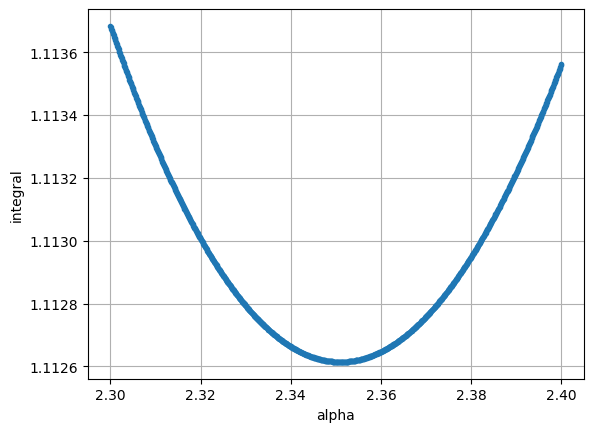

In [20]:
# variational method
num_samples = int(1e5)

alphas = np.linspace(2.3, 2.4, 1000)
ys = np.zeros_like(alphas)
for i, alpha in enumerate(alphas):
    rands = get_rng(alpha, num_samples)
    eps = lambda x: 0.5*x**2 + 2/(alpha**2-x**2)
    integral = np.mean(eps(rands))
    ys[i] = integral

plt.plot(alphas, ys, ".-")
plt.xlabel('alpha') 
plt.ylabel('integral')
plt.grid()

opt_alpha = np.argmin(ys)
print(f"Optimal alpha: {alphas[opt_alpha]:.4f}")
print(f"Minimum integral: {ys[opt_alpha]:.4f}")